#**RETAIL STORE SALES ANALYSIS**


 **1.Load the dataset into pandas and provide a summary of columns in the loaded dataset without any modification**

**2.Prepare the data frame for further analysis. Clean it, mold it in any manner you see fit.**

 **3.Provide a summary of the cleaned dataset along with some preliminary analysis and contrast it with the uncleaned dataset wherever modifications are made.**

### **Answer the following questions using the clean dataset by plotting suitable graphs:**


**4.What is the distribution of sales among different cities in different months?**

**a.Which city had the highest sales overall?**

**b.Which Month had the highest amount of sales overall?**

**c.Most bought products per city.**

 **Based on your analysis, suggest a city for establishing a new branch for the retail store backed with proper reasoning**

**5.Find out the distribution of sales over different times of the day (Morning, Afternoon, Evening, Night) and answer the following for each city;**

**a.What products are mostly sold at different times of the day**

**b.Which time of day has the most sales?**

**Based on your analysis, suggest the best working hours and the best products for the retail stores in each city.**

**6.Find out the pair of products that are most sold together. For example, generally, we would expect a person who buys an iPhone 11 to also buy the Apple Airpods together with it. Identify such pairs of products and suggest what promotional offers should the retail company come up with based on your outcome**

## **1..Load the dataset into pandas and provide a summary of columns in the loaded dataset without any modification**

**Import necessary libraries and import dataset**

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
# read the csv file
df =pd.read_csv("/content/all_data_copy.csv")
#print dataset
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
373695,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
373696,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
373697,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
373698,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### **Summary of columns without any modification**


*   **Dataset having 373700 rows and 6 columns**
*   **Dataset is all about various electronic sales and details of product price and purchase details like order id,purchase address order**
*   **Here the 'Order Date','Quantity ordererd','Price Each','Order Id'are numerical datatype columns**
*   **The columns 'Product' and 'Purchase Address' are categorical data having nominal type of data**

## **2.Prepare the data frame for further analysis. Clean it, mold it in any manner you see fit**

In [83]:
df.info() #info of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373700 entries, 0 to 373699
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          372610 non-null  object
 1   Product           372610 non-null  object
 2   Quantity Ordered  372610 non-null  object
 3   Price Each        372610 non-null  object
 4   Order Date        372610 non-null  object
 5   Purchase Address  372610 non-null  object
dtypes: object(6)
memory usage: 17.1+ MB


In [84]:
df.isnull().sum() #Checking the null values

Order ID            1090
Product             1090
Quantity Ordered    1090
Price Each          1090
Order Date          1090
Purchase Address    1090
dtype: int64

In [85]:
df.isnull().sum()/len(df)*100   #checking the percentage of null values present in dataset

Order ID            0.291678
Product             0.291678
Quantity Ordered    0.291678
Price Each          0.291678
Order Date          0.291678
Purchase Address    0.291678
dtype: float64

**Dataset having equal null values of 0.29%**

In [86]:
#copying the dataset to df1  for safety purpose
df1=df.copy()
df1


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
373695,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
373696,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
373697,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
373698,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [87]:
#Renaming column
df1 = df1.rename(columns = {"Order ID": "OrdID",
                            "Quantity Ordered":"Quantity",
                            "Order Date": "Date",
                            "Purchase Address":"Address",
                            "Price Each":"Price_Each"})
                                  
df1

,OrdID,Product,Quantity,Price_Each,Date,Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
373695,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
373696,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
373697,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
373698,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [88]:
df1[df1.isna()].head(5)  # to know how nan values is like 

,OrdID,Product,Quantity,Price_Each,Date,Address
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
df1 =df1.dropna()         #Dropping the null values
df1

,OrdID,Product,Quantity,Price_Each,Date,Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
373695,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
373696,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
373697,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
373698,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [90]:
df1.isna().sum()/len(df1)*100    #checking the null values

OrdID         0.0
Product       0.0
Quantity      0.0
Price_Each    0.0
Date          0.0
Address       0.0
dtype: float64

In [91]:
df1.duplicated().value_counts()      #checking the duplicate values

True     186923
False    185687
dtype: int64

**Here more duplicate values. so we can drop those duplicate values**

In [92]:
df1[df1.duplicated()]    #take a look on duplicated values in dataset

,OrdID,Product,Quantity,Price_Each,Date,Address
875,142071,AA Batteries (4-pack),1,3.84,01/17/19 23:02,"131 2nd St, Boston, MA 02215"
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
373695,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
373696,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
373697,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
373698,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [93]:
df1[df1["OrdID"] == 'Order ID']     #checking with Order ID to know duplicate values

,OrdID,Product,Quantity,Price_Each,Date,Address
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
372014,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
372401,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
373413,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
373482,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [94]:
df1=df1.drop_duplicates()           #Dropping those duplicate values
df1

,OrdID,Product,Quantity,Price_Each,Date,Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [95]:
df1[df1['OrdID']=='Order ID']                               # Again Checking for any duplicate values

,OrdID,Product,Quantity,Price_Each,Date,Address
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [96]:
df1.drop(df1[df1['OrdID']=='Order ID'].index,inplace=True)     # drop above perticular index

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [97]:
df1.duplicated().value_counts()          #Checking again for any duplicate values

False    185686
dtype: int64

**Conveting data to further proccess/analysis**

In [98]:
df1.info()                              #Checking datatype of columns with ifo function

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   OrdID       185686 non-null  object
 1   Product     185686 non-null  object
 2   Quantity    185686 non-null  object
 3   Price_Each  185686 non-null  object
 4   Date        185686 non-null  object
 5   Address     185686 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


**Here every column is in object datatype,so we have to covert them to its relevant datatype**


In [99]:
df1=df1.astype({'OrdID':'int64','Quantity':'int64','Price_Each':'float64','Date':'datetime64'})    ##Changing the datatype of columns to its relevant datatype
df1.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   OrdID       185686 non-null  int64         
 1   Product     185686 non-null  object        
 2   Quantity    185686 non-null  int64         
 3   Price_Each  185686 non-null  float64       
 4   Date        185686 non-null  datetime64[ns]
 5   Address     185686 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 9.9+ MB


In [100]:
#splitting address column into Street,city,state columns
df1[['STREET','CITY','STATE']] = df1['Address'].str.split(',',expand =True )
df1

,OrdID,Product,Quantity,Price_Each,Date,Address,STREET,CITY,STATE
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",944 Walnut St,Boston,MA 02215
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",185 Maple St,Portland,OR 97035
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",538 Adams St,San Francisco,CA 94016
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",738 10th St,Los Angeles,CA 90001
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",387 10th St,Austin,TX 73301
...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14 Madison St,San Francisco,CA 94016
186846,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",549 Willow St,Los Angeles,CA 90001
186847,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",273 Wilson St,Seattle,WA 98101
186848,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",778 River St,Dallas,TX 75001


In [101]:
#Dropping the column 'Address'
df1 = df1.drop(columns=['Address'])

In [102]:
df1.head(5)

,OrdID,Product,Quantity,Price_Each,Date,STREET,CITY,STATE
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,944 Walnut St,Boston,MA 02215
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,185 Maple St,Portland,OR 97035
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,538 Adams St,San Francisco,CA 94016
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,738 10th St,Los Angeles,CA 90001
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,387 10th St,Austin,TX 73301


**Extracting date,month,year and time from Date columns**


In [103]:
df1['Day']=df1.Date.dt.day               #converting date to day
df1['Month']=df1.Date.dt.month_name()    #converting date to month name
df1['Year']=df1.Date.dt.year             #converting date to year
df1['Hour']=df1.Date.dt.hour             #converting date to hour
df1.head(5)

,OrdID,Product,Quantity,Price_Each,Date,STREET,CITY,STATE,Day,Month,Year,Hour
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,944 Walnut St,Boston,MA 02215,22,January,2019,21
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,185 Maple St,Portland,OR 97035,28,January,2019,14
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,538 Adams St,San Francisco,CA 94016,17,January,2019,13
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,738 10th St,Los Angeles,CA 90001,5,January,2019,20
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,387 10th St,Austin,TX 73301,25,January,2019,11


In [104]:
df1 = df1.drop(columns=['Date'])          #Dropping the column 'Date'

In [105]:
df1

,OrdID,Product,Quantity,Price_Each,STREET,CITY,STATE,Day,Month,Year,Hour
0,141234,iPhone,1,700.00,944 Walnut St,Boston,MA 02215,22,January,2019,21
1,141235,Lightning Charging Cable,1,14.95,185 Maple St,Portland,OR 97035,28,January,2019,14
2,141236,Wired Headphones,2,11.99,538 Adams St,San Francisco,CA 94016,17,January,2019,13
3,141237,27in FHD Monitor,1,149.99,738 10th St,Los Angeles,CA 90001,5,January,2019,20
4,141238,Wired Headphones,1,11.99,387 10th St,Austin,TX 73301,25,January,2019,11
...,...,...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,14 Madison St,San Francisco,CA 94016,11,December,2019,20
186846,319667,AA Batteries (4-pack),2,3.84,549 Willow St,Los Angeles,CA 90001,1,December,2019,12
186847,319668,Vareebadd Phone,1,400.00,273 Wilson St,Seattle,WA 98101,9,December,2019,6
186848,319669,Wired Headphones,1,11.99,778 River St,Dallas,TX 75001,3,December,2019,10


**From above code to completed that**

*   **Null values are removed**
*   **Duplicated values are removed**
*   **Converted to relevant datatype**
*   **convert/split date column to day,month,month name,year columns**


## **4.What is the distribution of sales among different cities in different months?**

**most sold products:**

Text(0.5, 1.0, 'distribution of sold products')

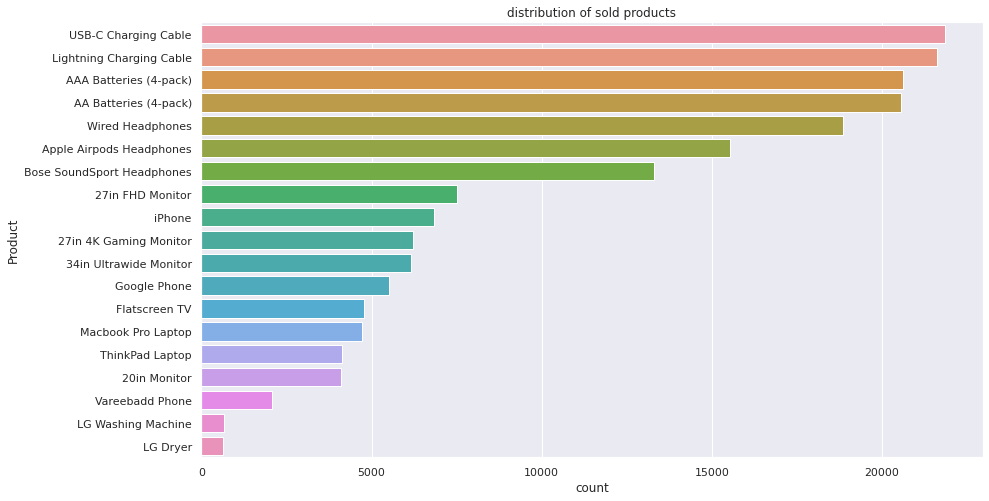

In [106]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(14, 8))
sns.countplot(y ='Product', data = df1,
              order = df1['Product'].value_counts().index)    #count plot to see the distribution of sales in descending order
plt.title("distribution of sold products")

Most sold products are:

*   **USB-C Charging cable**
*   **lighting charging cable**




**we dont have sales column,so we have to create sales column manually by multiplying price and quantity**

In [107]:
df1['Sales']=df1.apply(lambda x:(x['Price_Each']*x['Quantity']),axis=1)   #creating sales column by using lamda funtion

### **a.Which Month had the highest amount of sales overall?**

In [108]:
Month_sales = df1.groupby(['Month']).agg({'Sales':'sum'}).reset_index() 
Month_sales                                                               # using groupby,aggregation function to get sales in diffrent months

,Month,Sales
0,April,3389217.98
1,August,2241083.37
2,December,4608295.70
3,February,2200078.08
4,January,1821413.16
5,July,2646461.32
6,June,2576280.15
7,March,2804973.35
8,May,3150616.23
9,November,3197875.05


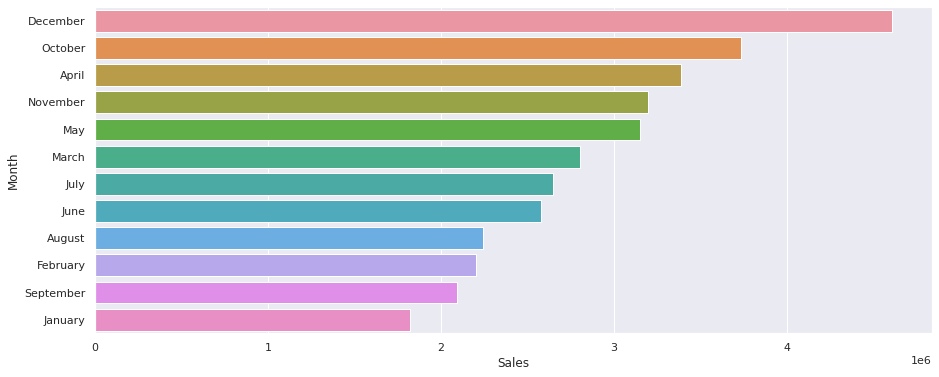

In [109]:
plt.figure(figsize=(15, 6))
ax = sns.barplot(y="Month", x="Sales",data=Month_sales,order=Month_sales.sort_values('Sales',ascending=False).Month)    #overall sales in diffrent months

**From above we can conclude that December having highest sales**

## **b.Which city had the highest sales overall?**

In [110]:
City_sales = df1.groupby(['CITY']).agg({'Sales':'sum'}).reset_index()    #using groupby,aggregation function to get sales in diffrent cities
City_sales

,CITY,Sales
0,Atlanta,2794199.07
1,Austin,1818044.33
2,Boston,3658627.65
3,Dallas,2765373.96
4,Los Angeles,5448304.28
5,New York City,4661867.14
6,Portland,2319331.94
7,San Francisco,8254743.55
8,Seattle,2745046.02


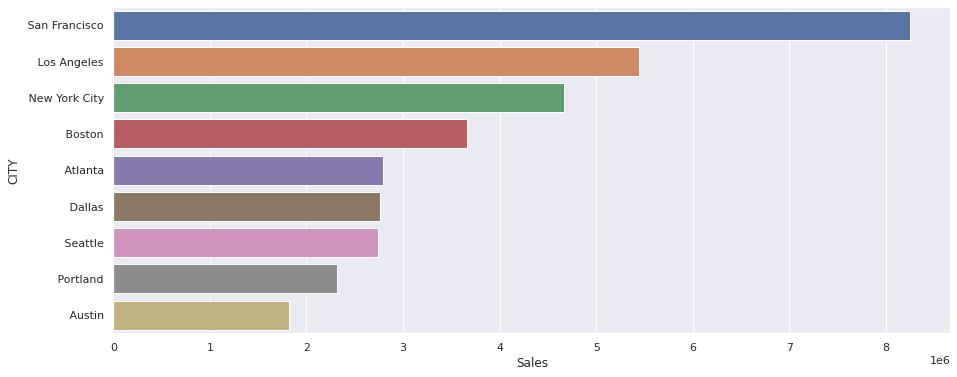

In [111]:
plt.figure(figsize=(15, 6))
ax1 = sns.barplot(y="CITY", x="Sales", data=City_sales,order=City_sales.sort_values('Sales',ascending=False).CITY)

### **From above plot, we get that san_francisco city is having highest sales**

## **What is the distribution of sales among different cities in different months?**

In [112]:
City_month = df1.groupby(['CITY','Month'],as_index=False).sum().sort_values(by ='Sales',ascending=False)
City_month

,CITY,Month,OrdID,Quantity,Price_Each,Day,Year,Hour,Sales
86,San Francisco,December,1847825581,6772,1099481.97,96370,12122076,86681,1105582.13
94,San Francisco,October,1279730602,5298,861036.82,75565,9608421,67263,865800.33
84,San Francisco,April,819741893,4972,805654.68,68062,8930037,63544,812387.30
92,San Francisco,May,792828306,4441,770672.36,62894,7926594,56319,774967.54
93,San Francisco,November,1237421694,4835,760425.52,66571,8701890,62545,764502.40
...,...,...,...,...,...,...,...,...,...
13,Austin,August,157108143,734,124996.01,10301,1308312,9163,125563.62
76,Portland,January,91549279,693,114463.50,10061,1261877,9035,114985.56
15,Austin,February,97091099,681,107896.70,8548,1253799,9088,108358.52
23,Austin,September,167930146,762,105675.92,10116,1336578,9372,106333.70


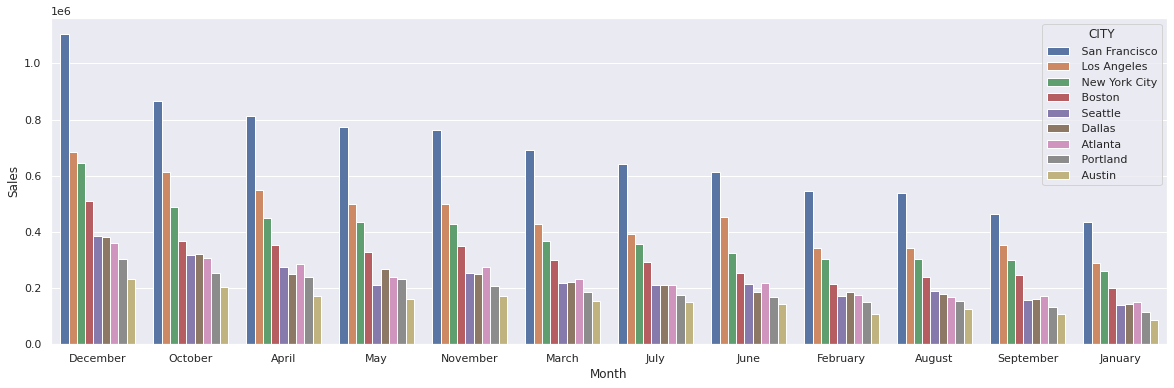

In [113]:
plt.figure(figsize=(20, 6))
sns.barplot(x = 'Month',y = 'Sales',hue = 'CITY',data = City_month)

**From above plot/analysis, san francisco  having highest sales in every month compared to other cities so that,**

**I can suggest the city san francisco is good for establishing new branch for the retail store backed**

## **5.Find out the distribution of sales over different times of the day (Morning, Afternoon, Evening, Night) and answer the following for each city;**

In [114]:
def f(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'After Noon'
    elif (x > 16) and (x <= 20) :
        return 'Evening'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'

In [115]:
df1['session'] = df1['Hour'].apply(f)
df1

,OrdID,Product,Quantity,Price_Each,STREET,CITY,STATE,Day,Month,Year,Hour,Sales,session
0,141234,iPhone,1,700.00,944 Walnut St,Boston,MA 02215,22,January,2019,21,700.00,Night
1,141235,Lightning Charging Cable,1,14.95,185 Maple St,Portland,OR 97035,28,January,2019,14,14.95,After Noon
2,141236,Wired Headphones,2,11.99,538 Adams St,San Francisco,CA 94016,17,January,2019,13,23.98,After Noon
3,141237,27in FHD Monitor,1,149.99,738 10th St,Los Angeles,CA 90001,5,January,2019,20,149.99,Evening
4,141238,Wired Headphones,1,11.99,387 10th St,Austin,TX 73301,25,January,2019,11,11.99,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,14 Madison St,San Francisco,CA 94016,11,December,2019,20,14.95,Evening
186846,319667,AA Batteries (4-pack),2,3.84,549 Willow St,Los Angeles,CA 90001,1,December,2019,12,7.68,Morning
186847,319668,Vareebadd Phone,1,400.00,273 Wilson St,Seattle,WA 98101,9,December,2019,6,400.00,Early Morning
186848,319669,Wired Headphones,1,11.99,778 River St,Dallas,TX 75001,3,December,2019,10,11.99,Morning


### **a.What products are mostly sold at different times of the day**

In [116]:
Day_sales = df1.groupby(['Product','session'],as_index=False).sum().sort_values(by ='Sales',ascending=False)
Day_sales

,Product,session,OrdID,Quantity,Price_Each,Day,Year,Hour,Sales
80,Macbook Pro Laptop,Evening,294053071,1274,2165800.00,19825,2572206,23596,2165800.00
78,Macbook Pro Laptop,After Noon,256931726,1101,1870000.00,17340,2220900,15908,1871700.00
82,Macbook Pro Laptop,Morning,252093928,1097,1861500.00,17357,2210805,11636,1864900.00
110,iPhone,Evening,412562225,1798,1257900.00,28115,3628143,33354,1258600.00
112,iPhone,Morning,386941256,1694,1184400.00,26490,3416148,18068,1185800.00
...,...,...,...,...,...,...,...,...,...
105,Wired Headphones,Late Night,217939825,1011,11210.65,15140,1887766,1118,12121.89
25,AA Batteries (4-pack),Early Morning,356251150,2080,5925.12,24326,3115317,10932,7987.20
31,AAA Batteries (4-pack),Early Morning,357854170,2372,4628.52,24697,3125412,10974,7092.28
27,AA Batteries (4-pack),Late Night,219256546,1229,3621.12,15062,1903917,1099,4719.36


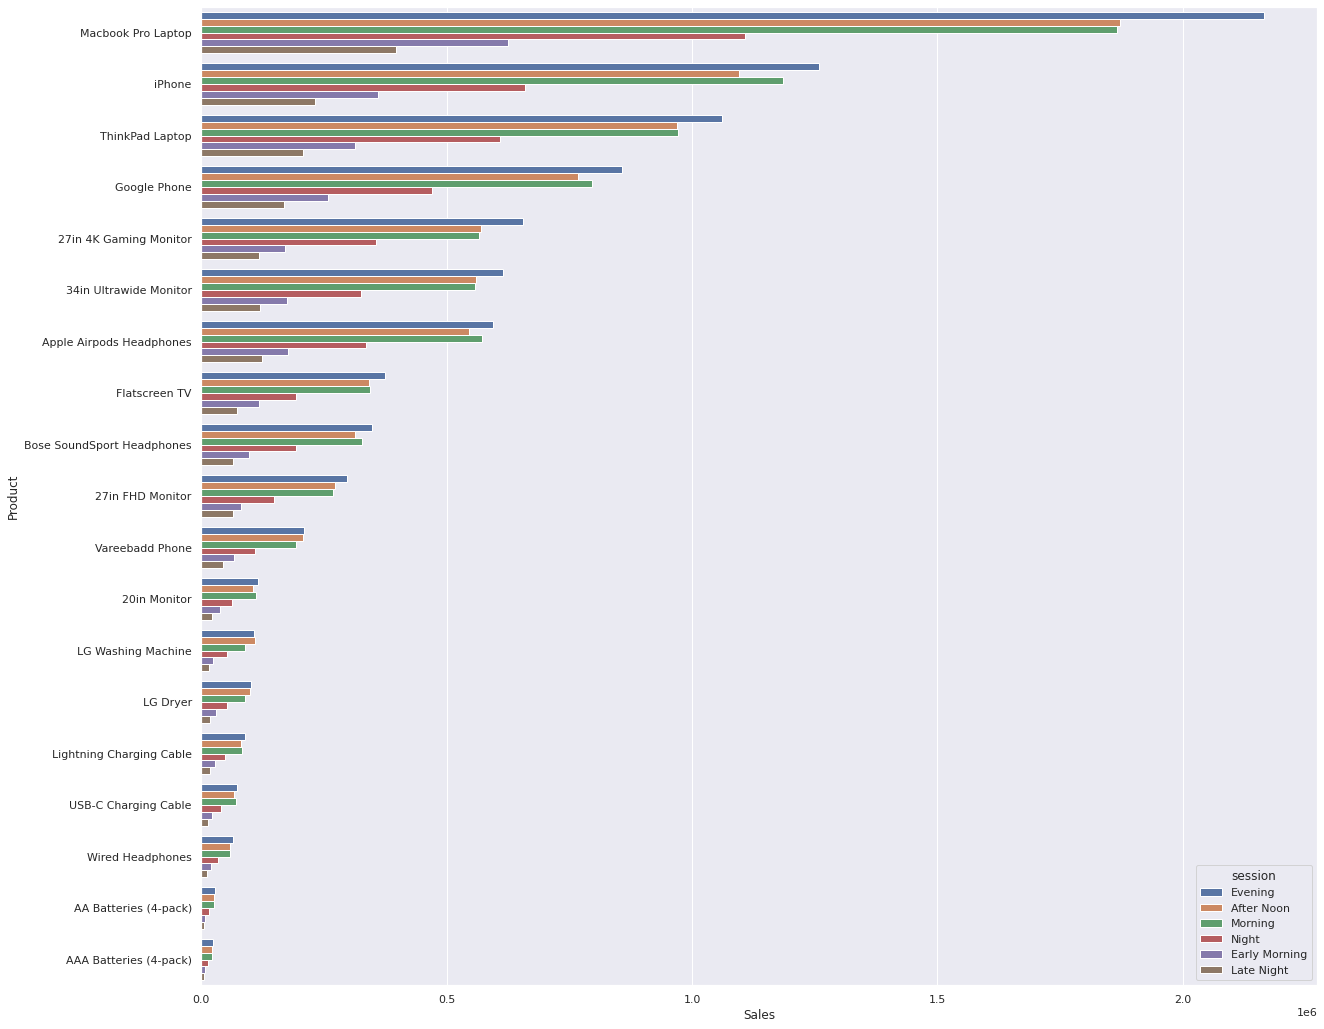

In [117]:
plt.figure(figsize=(20, 18))
ax = sns.barplot(y = 'Product',x= 'Sales',hue = 'session',data =Day_sales )

**From above we conclude that each and every product has highest sales in evening between 4 pm to 8 pm**

**b.Which time of day has the most sales**

In [118]:
session1= df1.groupby(['session']).agg({'Sales':'count'}).reset_index()
session1

,session,Sales
0,After Noon,43598
1,Early Morning,14055
2,Evening,48251
3,Late Night,9173
4,Morning,44634
5,Night,25975


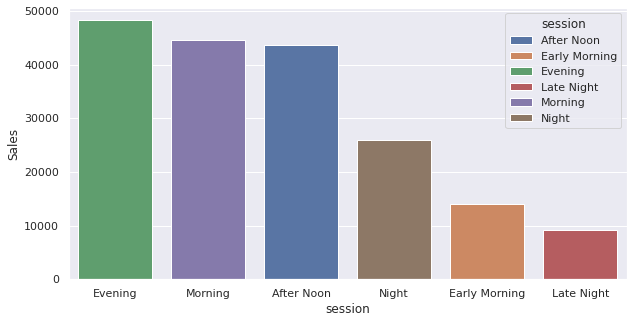

In [119]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="session",y ="Sales",hue ='session', data=session1,dodge=False,order=session1.sort_values('Sales',ascending=False).session)

**From above plot we got that Evening time has highest sales**

**From A,B and Based on their analysis,** 
*   **Evening time(4PM to 8PM) is the best working hours**
*   **The best products are Macpro laptop and iphone for the retail stores in each city**



## **Find out the pair of products that are most sold together**

In [120]:
(df1.groupby('OrdID')['Product'].count()==2).value_counts()

False    171911
True       6526
Name: Product, dtype: int64

In [121]:
df2= df1.copy()
df2['grouped'] = df2.groupby('OrdID')['Product'].transform(lambda x: ','.join(x))
pair = df2[['OrdID','grouped']].drop_duplicates()          

In [122]:
pair[pair['grouped'].apply(lambda x:len(x.split(',')))==2]

,OrdID,grouped
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
186710,319536,"Macbook Pro Laptop,Wired Headphones"
186731,319556,"Google Phone,Wired Headphones"
186760,319584,"iPhone,Wired Headphones"
186773,319596,"iPhone,Lightning Charging Cable"


In [123]:
pair[pair['grouped'].apply(lambda x:len(x.split(',')))==2]['grouped'].value_counts().head(10)

iPhone,Lightning Charging Cable                  886
Google Phone,USB-C Charging Cable                857
iPhone,Wired Headphones                          361
Vareebadd Phone,USB-C Charging Cable             312
Google Phone,Wired Headphones                    303
iPhone,Apple Airpods Headphones                  286
Google Phone,Bose SoundSport Headphones          161
Vareebadd Phone,Wired Headphones                 104
Vareebadd Phone,Bose SoundSport Headphones        60
Lightning Charging Cable,USB-C Charging Cable     55
Name: grouped, dtype: int64

**As we got good information from above cells,**

   **iPhone,Lightning Charging Cable and Google Phone,USB-C Charging Cable are bought together the most.**
   
   **According to this, my suggestion is to  provide some promotional offers and discounts on these products for more sales**